In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

def find_category(c):
    category=[i[0] for i in c]
    return category

def create_dataframe(column_names,source_data):
     transformed_data= [{k: v for k, v in x.items() if k in column_names} for x in source_data]
     return pd.DataFrame(transformed_data).apply(lambda y: find_category(y[0:]) if y.name in ['category'] else y)


In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

In [5]:
# YOUR CODE HERE
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment=PLAID_ENV)

### 2. Generate a public token

In [6]:
# YOUR CODE HERE
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [7]:
# YOUR CODE HERE
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [8]:
pretty_print_response( client.Accounts.get(access_token))

{
    "accounts": [
        {
            "account_id": "zq4oA6jRnwUVon7r7wn3t54BpPM7D8uo9nP3D",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "BxqyvoV1rKuMQKdedNK3IJ7qRXolQ4fwPlez7",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [9]:
# Get transactions for institution for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

transaction_response = client.Transactions.get(access_token,start_date,end_date)
pretty_print_response(transaction_response['transactions'][:1])

[
    {
        "account_id": "zq4oA6jRnwUVon7r7wn3t54BpPM7D8uo9nP3D",
        "account_owner": null,
        "amount": 6.33,
        "category": [
            "Travel",
            "Car Service",
            "Ride Share"
        ],
        "category_id": "22006001",
        "date": "2019-10-01",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "Uber 072515 SF**POOL**",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
        "pending_transaction_id": null,
     

### 2. Print the categories for each transaction

In [10]:
transactions=transaction_response['transactions']
category=list(map(lambda t: t['category'],transactions))
category

[['Travel', 'Car Service', 'Ride Share'],
 ['Food and Drink', 'Restaurants'],
 ['Payment'],
 ['Food and Drink', 'Restaurants'],
 ['Shops', 'Sporting Goods'],
 ['Payment', 'Credit Card'],
 ['Travel', 'Car Service', 'Ride Share'],
 ['Transfer', 'Debit'],
 ['Transfer', 'Deposit'],
 ['Recreation', 'Gyms and Fitness Centers'],
 ['Travel', 'Airlines and Aviation Services'],
 ['Food and Drink', 'Restaurants'],
 ['Food and Drink', 'Restaurants', 'Coffee Shop'],
 ['Food and Drink', 'Restaurants'],
 ['Transfer', 'Credit'],
 ['Travel', 'Airlines and Aviation Services'],
 ['Travel', 'Car Service', 'Ride Share']]

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [11]:
custom_cols=['date','name','amount','category']
cust_data=create_dataframe(custom_cols,transactions)
cust_dat=cust_data[cust_data['amount']>0]
cust_dat

,amount,category,date,name
0,6.33,Travel,2019-10-01,Uber 072515 SF**POOL**
1,500.00,Food and Drink,2019-09-28,Tectra Inc
2,2078.50,Payment,2019-09-27,AUTOMATIC PAYMENT - THANK
3,500.00,Food and Drink,2019-09-27,KFC
4,500.00,Shops,2019-09-27,Madison Bicycle Shop
5,25.00,Payment,2019-09-18,CREDIT CARD 3333 PAYMENT *//
6,5.40,Travel,2019-09-18,Uber 063015 SF**POOL**
7,5850.00,Transfer,2019-09-17,ACH Electronic CreditGUSTO PAY 123456
8,1000.00,Transfer,2019-09-17,CD DEPOSIT .INITIAL.
9,78.50,Recreation,2019-09-16,Touchstone Climbing


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [12]:
# Set Index

cust_data.set_index(cust_data['date'],inplace=True)
cust_data.index=pd.to_datetime(cust_data.index)
cust_data['amount']=cust_data.amount.astype(float)

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [14]:
historical_transactions =client.Income.get(access_token)
income_data=historical_transactions['income']
gross_income=income_data['last_year_income_before_tax']
monthly_income=income_data['income_streams'][0]['monthly_income']
projected_yearly_income=income_data['projected_yearly_income']

In [15]:
print(f'The previous year\'s gross income is ${gross_income}')

The previous year's gross income is $7285


In [16]:
print(f'The currently monthly income is ${monthly_income}')

The currently monthly income is $500


In [17]:
print(f'The projected yearly income is ${projected_yearly_income}')

The projected yearly income is $6085


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [18]:
total_spending_per_category=cust_data.groupby(['category']).sum()
total_spending_per_category.reset_index()

,category,amount
0,Food and Drink,1105.73
1,Payment,2103.50
2,Recreation,78.50
3,Shops,500.00
4,Transfer,6845.78
5,Travel,18.06


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B26B6C898>],
      dtype=object)

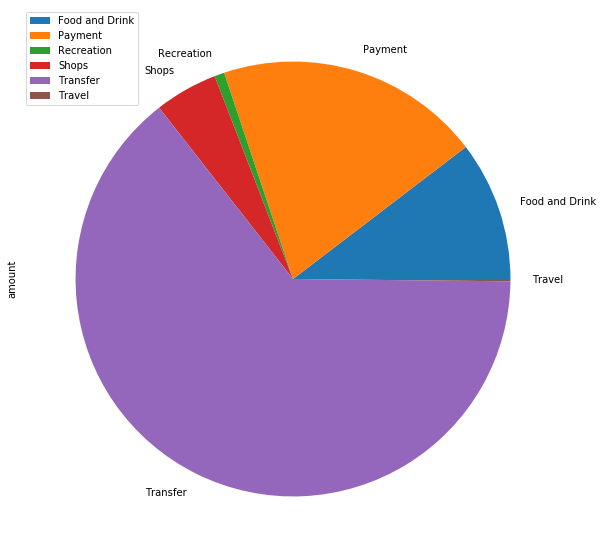

In [25]:
spending=total_spending_per_category.plot.pie(subplots=True,figsize=(10,10))
spending

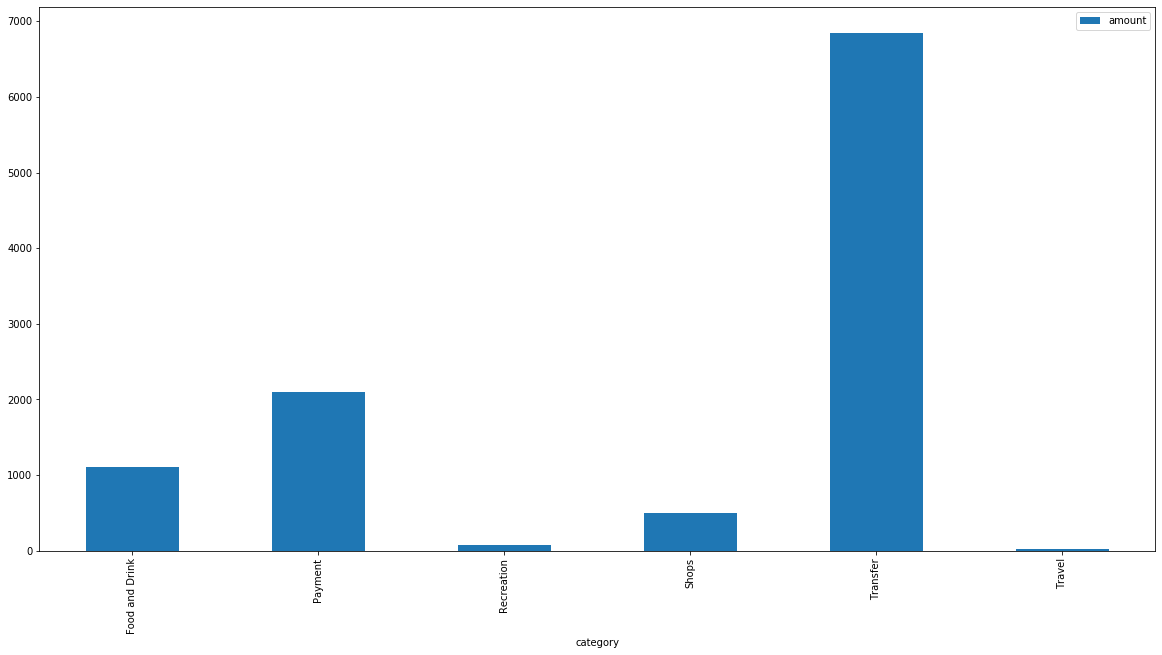

In [21]:
total_spending_per_category.plot.bar(figsize=(20,10))

### Calculate the expenses per month

In [ ]:
expense_per_month=cust_data.groupby([cust_data.index.month],).sum()
expense_per_month

In [ ]:
expense_per_month.plot.bar(figsize=(20,10))